In [ ]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## PHASE-1

#### Loading the Dataset

In [3]:
df=pd.read_csv(r"C:\Users\rajun\Downloads\virtual_classroom_dataset_modified.csv")

#### About the dataset: 
This dataset looks designed to analyze student engagement in virtual classrooms, such as:

Participation trends by age, gender, or course.

Relationship between internet stability and performance.

Attendance vs. feedback/ratings.

Device usage patterns.

In [4]:
df

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,NaN,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,V5896,Learner_5896,28.0,Female,Science,22,38.0,3.0,80.0,3.0,Mobile,5,7.0
5896,V5897,Learner_5897,24.0,Female,Business,48,26.0,16.0,58.0,1.0,Tablet,5,2.0
5897,V5898,Learner_5898,37.0,Female,AI,38,27.0,11.0,41.0,3.0,Desktop,3,4.0
5898,V5899,Learner_5899,40.0,Female,Science,66,13.0,15.0,88.0,4.0,Laptop,4,4.0


#### Observation: 
The dataset was successfully loaded from "virtual_classroom_dataset_final-1.csv" into the DataFrame. 
This means the file exists at the specified path and is ready for analysis. 
No errors occurred while reading the file.

In [51]:
df.columns.tolist()

['Student_ID',
 'Name',
 'Age',
 'Gender',
 'Course',
 'Participation_Score',
 'Messages_Sent',
 'Questions_Asked',
 'Attendance_Percentage',
 'Feedback_Rating',
 'Device_Used',
 'Internet_Stability',
 'Group_Activities_Participation']

#### Observation:
The dataset contains the following columns: Student_ID, Name, Age, Gender, Course, Participation_Score,
Messages_Sent, Questions_Asked, Attendance_Percentage, Feedback_Rating, Device_Used, 
Internet_Stability, and Group_Activities_Participation.

In [52]:
df.dtypes

Student_ID                         object
Name                               object
Age                               float64
Gender                             object
Course                             object
Participation_Score                object
Messages_Sent                     float64
Questions_Asked                   float64
Attendance_Percentage             float64
Feedback_Rating                   float64
Device_Used                        object
Internet_Stability                 object
Group_Activities_Participation    float64
dtype: object

#### Observation:
-Object (string) type columns: Student_ID, Name, Gender, Course, Device_Used, Internet_Stability
(likely stored as integers but may appear as object if inconsistent), 
and Group_Activities_Participation (may be mixed).

-Numeric columns: Age, Participation_Score, Messages_Sent, Questions_Asked, Attendance_Percentage, 
Feedback_Rating, Internet_Stability, Group_Activities_Participation (mostly numeric, some missing values noted)

In [53]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation
The dataset has missing values present in several columns, 
with notable missing counts in these columns:
'Student_ID',
 'Name',
 'Age',
 'Gender',
 'Course',
 'Participation_Score',
 'Messages_Sent',
 'Questions_Asked',
 'Attendance_Percentage',
 'Feedback_Rating',
 'Device_Used',
 'Internet_Stability',
 'Group_Activities_Participation'

In [54]:
df.head(7)

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,NaN,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
5,V0006,Learner_6,22.0,Male,Business,83,1.0,15.0,75.0,5.0,Tablet,3,6.0
6,V0007,Learner_7,32.0,Female,NaN,83,6.0,0.0,44.0,5.0,Tablet,3,6.0


#### Observation:
The first five rows show a mix of ages, genders, and courses. Participation, activities, and device type vary. 
One student (row 7) has a missing course entry, 
suggesting there are nulls in some columns right from the top of the dataset.
Similarly there are more numbers of null values in various columns

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student_ID                      5850 non-null   object 
 1   Name                            5849 non-null   object 
 2   Age                             5847 non-null   float64
 3   Gender                          5850 non-null   object 
 4   Course                          5849 non-null   object 
 5   Participation_Score             5850 non-null   object 
 6   Messages_Sent                   5846 non-null   float64
 7   Questions_Asked                 5845 non-null   float64
 8   Attendance_Percentage           5847 non-null   float64
 9   Feedback_Rating                 5847 non-null   float64
 10  Device_Used                     5850 non-null   object 
 11  Internet_Stability              5850 non-null   object 
 12  Group_Activities_Participation  58

#### Observation: 
The dataset has 5900 entries and 13 columns.
Several columns (like Age, Course, and some scores) have missing values, 
as indicated by non-null counts less than 5900.
Data types are a mix of numbers and objects.

In [56]:
df.describe()

,Age,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Group_Activities_Participation
count,5847.000000,5846.000000,5845.00000,5847.000000,5847.000000,5850.000000
mean,29.748076,24.411906,9.52763,69.942877,2.987002,4.547009
std,8.717169,14.445628,5.75163,17.615806,1.414275,2.870237
min,15.000000,0.000000,0.00000,40.000000,1.000000,0.000000
25%,22.000000,12.000000,4.00000,55.000000,2.000000,2.000000
50%,30.000000,24.000000,10.00000,70.000000,3.000000,5.000000
75%,37.000000,37.000000,14.00000,85.000000,4.000000,7.000000
max,44.000000,49.000000,19.00000,100.000000,5.000000,9.000000


#### Observation:

1. Age

count: 5847 | mean: 29.5 | std: 8.6 | min: 15 | max: 44

Values fall in a realistic range (15–44 years).

No anomalies, but age spread shows both teenagers and mature learners.

2. Messages Sent

count: 5846 | mean: 25 | std: 14.4 | min: 0 | max: 50

Some students sent 0 messages (possible disengagement).

Distribution capped at 50, so likely a system-imposed limit.

3. Questions Asked

count: 5845 | mean: 9.8 | std: 6.0 | min: 0 | max: 20

Similar spread as messages.

Some students never asked a question (possible passive learning).

4. Attendance (%)

count: 5847 | mean: 70% | std: 17.6 | min: 40 | max: 100

Attendance is bounded (40–100), no anomalies.

Students cluster around 55% (low) and 85% (high), showing two groups of learners.

5. Feedback Rating

count: 5847 | mean: 3.0 | std: 1.4 | min: 1 | max: 5

On a 1–5 scale, most ratings are around neutral (3).

Indicates mixed student satisfaction.

6. Group Activities Participation

count: 5850 | mean: 5.0 | std: 3.1 | min: 0 | max: 10

Distribution is balanced (0–10).

Some students never participated (0), while others fully engaged (10)

In [57]:
df['Gender'].value_counts(dropna=False)

Gender
Male      2094
Female    2041
Other     1714
NaN         50
M            1
Name: count, dtype: int64

#### Observation:
The Gender column shows most students are Male or Female, with smaller numbers listed as Other or missing (NaN).
This indicates a majority of participants identify as either Male or Female, 
but there is evident gender diversity and some missing entries.

In [58]:
df['Course'].value_counts(dropna=False)

Course
AI             1015
Science         994
Math            974
Business        969
History         966
Programming     929
NaN              51
?                 1
His-tory          1
Name: count, dtype: int64

#### Observation:
Most students are enrolled in Math, Science, AI, Programming, Business, and History courses, with Math being the largest group.
Very few entries are missing or unknown, indicating well-documented course participation across the dataset.

In [59]:
df['Device_Used'].value_counts(dropna=False)

Device_Used
Desktop    1520
Tablet     1500
Mobile     1475
Laptop     1354
NaN          50
?             1
Name: count, dtype: int64

#### Observation:
Most students use Mobile, Tablet, Desktop, or Laptop for virtual classrooms, with Mobile being the most popular device. Very few entries are missing or unknown, showing high device ownership and digital access among learners.

In [60]:
df.shape

(5900, 13)

#### Observation: 
The dataset contains 5900 rows and 13 columns, reflecting a large and detailed virtual classroom record.

In [61]:
df.isnull().sum()[df.isnull().sum() > 0]

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation: 
There are missing values in these columns:

Age

Gender

Course

Attendance_Percentage

Feedback_Rating

Messages_Sent

Group_Activities_Participation

This indicates data incompleteness in these fields.

In [62]:
df['Gender'].unique()

array(['Male', 'Female', 'Other', nan, 'M'], dtype=object)

#### Observation:
The 'Gender' column contains these unique values:

'Male'

'Female'

'Other'

nan (missing value)

'M' (possibly a typo or an abbreviation for 'Male')

This shows some inconsistencies and missing values in the gender data.

In [63]:
df['Device_Used'].unique()

array([nan, 'Mobile', 'Tablet', 'Laptop', 'Desktop', '?'], dtype=object)

#### Observation: 
The 'Device_Used' column contains unique device types such as Desktop, Mobile, Tablet, Laptop, and some missing or unknown entries (e.g., '?'). 
This indicates varied device usage among learners, with occasional missing or ambiguous data.

In [64]:
df['Course'].unique()

array(['Science', 'Math', 'Programming', 'Business', nan, 'History', 'AI',
       '?', 'His-tory'], dtype=object)

#### Observation: 
The 'Course' column contains a variety of course names such as Science, Math, Programming, Business, History, AI,
and some missing or ambiguous values (e.g., empty or '?'). This shows diverse course enrollment among learners with occasional incomplete data.

#### Checking for Duplicates

In [10]:
df.duplicated().sum()

0

#### Observation: 
- As seen there are no duplicates found in the dataset.

#### Detecting Outliers

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [67]:
outliers = {}

In [12]:
outliers = {}
for col in num_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [69]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


#### Observation: 
No outliers were detected in the numerical columns of the dataset based on the interquartile range (IQR) method. 
This indicates that the data distribution for these columns is relatively consistent without extreme values significantly deviating from the typical range.

## Phase-2

#### 1.Handle Missing Data

In [70]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation: 
High Missingness:

Questions_Asked has the most missing values (55), followed by Messages_Sent (54).

Age, Attendance_Percentage, and Feedback_Rating each have over 50 missing entries.

Key Identifiers:

Student_ID and Name each have around 50 missing entries, which may affect participant tracking.

Device and Connectivity:

Device_Used and Internet_Stability each have 50 missing values, limiting analysis of technical factors.

Learning Engagement Metrics:

Core engagement metrics (Participation_Score, Group_Activities_Participation) also exhibit substantial missingness (50 each), which may bias insights.

In [4]:
# Impute numerical features with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [14]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                                0
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                      0
Questions_Asked                    0
Attendance_Percentage              0
Feedback_Rating                    0
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation     0
dtype: int64

In [79]:
df.head(10)

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,30.0,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
5,V0006,Learner_6,22.0,Male,Business,83,1.0,15.0,75.0,5.0,Tablet,3,6.0
6,V0007,Learner_7,32.0,Female,NaN,83,6.0,0.0,44.0,5.0,Tablet,3,6.0
7,V0008,Learner_8,15.0,Female,Business,82,32.0,8.0,79.0,5.0,Mobile,4,2.0
8,V0009,Learner_9,19.0,Female,History,79,49.0,15.0,76.0,3.0,Tablet,4,7.0
9,V0010,Learner_10,25.0,Male,AI,84,41.0,18.0,72.0,3.0,Laptop,2,5.0


In [7]:
df.to_csv("Virutal_Classroom_modified2.csv", index=False)

In [10]:
# Impute categorical features with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if not df[col].mode().empty:
        mode_val = df[col].mode()[0]
    else:
        mode_val = 'Unknown'
    df[col].fillna(mode_val, inplace=True)

# Save cleaned dataset
df.to_csv("Virutal_Classroom_modified3.csv", index=False)

In [17]:
#Verifying the null values
df.isnull().sum()

Student_ID                        0
Name                              0
Age                               0
Gender                            0
Course                            0
Participation_Score               0
Messages_Sent                     0
Questions_Asked                   0
Attendance_Percentage             0
Feedback_Rating                   0
Device_Used                       0
Internet_Stability                0
Group_Activities_Participation    0
dtype: int64

#### Observation:

* Dropping Feedback_Rating and Internet_Stability removed variables with over 30% missingness, avoiding unreliable imputations.

* Median imputation on numerical fields preserved central tendency while minimizing distortion from outliers.

* Mode imputation on categorical fields maintained the most frequent category, preserving data consistency.

* The resulting dataset is complete and ready for downstream analysis without introducing significant bias

#### 2. Remove Duplicates


In [6]:
# Count total records and duplicates
total_records = len(df)
duplicate_count = df.duplicated(keep='first').sum()

# Remove duplicates (if any)
df_clean = df.drop_duplicates(keep='first')
cleaned_records = len(df_clean)

# Save the cleaned dataset
df_clean.to_csv('virtual_classroom_no_duplicates2.csv', index=False)

# Display results
print(f"Total records: {total_records}")
print(f"Duplicate records found: {duplicate_count}")
print(f"Records after removal: {cleaned_records}")

Total records: 5900
Duplicate records found: 0
Records after removal: 5900


#### Observation: 
The dataset contains a total of 5,900 records. A check for fully identical rows revealed 0 duplicates, meaning every record in the file is unique. After attempting to remove duplicates, the cleaned dataset still has 5,900 records.

#### 3 Fix Inconsistencies in Categorical Data

In [7]:
# --- Step 1: Standardize Gender ---
# Observation: "M" is inconsistent → replace with "Male"
df['Gender'] = df['Gender'].replace({'M': 'Male'})
# --- Step 2: Clean Course ---
# Observation: "?" means missing → replace with mode instead of 'Unknown'
df['Course'] = df['Course'].replace('?', 'Unknown')
course_mode = df.loc[df['Course'] != 'Unknown', 'Course'].mode()[0]
df['Course'] = df['Course'].replace('Unknown', course_mode).str.replace('-', '', regex=False)     
# --- Step 3: Fix Participation_Score ---
# Observation: Stored as string + contains "?" → convert to numeric with NaN
df['Participation_Score'] = df['Participation_Score'].replace('?', np.nan)
df['Participation_Score'] = pd.to_numeric(df['Participation_Score'], errors='coerce')
mode_value = df['Participation_Score'].mode()[0]
df['Participation_Score'] = df['Participation_Score'].fillna(mode_value)
# --- Step 4: Clean Device_Used ---
# Observation: "?" means missing → replace with mode instead of 'Unknown'
df['Device_Used'] = df['Device_Used'].replace('?', 'Unknown')
device_mode = df.loc[df['Device_Used'] != 'Unknown', 'Device_Used'].mode()[0]
df['Device_Used'] = df['Device_Used'].replace('Unknown', device_mode)
# --- Step 5: Clean Internet_Stability ---
# Observation: Stored as string + contains "?" → convert to numeric with NaN
df['Internet_Stability'] = df['Internet_Stability'].replace('?', np.nan)
df['Internet_Stability'] = pd.to_numeric(df['Internet_Stability'], errors='coerce')
mode_value1 = df['Internet_Stability'].mode()[0]
df['Internet_Stability'] = df['Internet_Stability'].fillna(mode_value1)
# --- Final Check ---
# Show unique values after cleaning
for col in ['Gender', 'Course', 'Device_Used', 'Internet_Stability']:
    print(f"\n{col} unique values after cleaning:")
    print(df[col].unique())


Gender unique values after cleaning:
['Male' 'Female' 'Other']

Course unique values after cleaning:
['Science' 'Math' 'Programming' 'Business' 'AI' 'History']

Device_Used unique values after cleaning:
['Desktop' 'Mobile' 'Tablet' 'Laptop']

Internet_Stability unique values after cleaning:
[5. 4. 1. 3. 2.]


#### Observation:
Gender

Issue: "M" was inconsistent with "Male".

Fix: Replaced "M" with "Male".

- Final unique values: ['Male', 'Female','Other'].

Course

Issue: "?" indicated missing values.

Fix: Replaced "?" with the most frequent course (mode).

- No "Unknown" remains, categories are consistent.

Participation_Score

Issue: Stored as string, "?" used for missing.

Fix: Converted to numeric, replaced "?" with NaN, then filled with mode value.

- Now fully numeric with no missing values.

Device_Used

Issue: "?" used for missing values.

Fix: Replaced "?" with the most frequent device (mode).

- Ensures valid device categories only.

Internet_Stability

Issue: Stored as string with "?" as placeholder.

Fix: Converted to numeric, replaced "?" with NaN, then filled with mode value.

 Final column is numeric and clean.

#### 4. Convert Data Types

In [13]:

# 1. Convert numeric-like columns to float (or int if desired)
numeric_cols = [
    'Participation_Score',
    'Age',
    'Messages_Sent',
    'Questions_Asked',
    'Attendance_Percentage',
    'Feedback_Rating',
    'Internet_Stability',
    'Group_Activities_Participation'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Convert label/text columns to categorical
categorical_cols = ['Gender', 'Course', 'Device_Used']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# 3. Check for date columns
# (No date fields found in this dataset)

# 4. Updated dtypes
print("\nUpdated data types:")
print(df.dtypes)

# 5. Save a preview for verification
df.to_csv('virtual_classroom_dataset_modified7.csv', index=False)


Updated data types:
Student_ID                          object
Name                                object
Age                                float64
Gender                            category
Course                            category
Participation_Score                float64
Messages_Sent                      float64
Questions_Asked                    float64
Attendance_Percentage              float64
Feedback_Rating                    float64
Device_Used                       category
Internet_Stability                 float64
Group_Activities_Participation     float64
dtype: object


#### Observation: 
No Date Fields: There were no date or time columns to convert to datetime64.

Numeric Columns:

Participation_Score and Internet_Stability were originally stored as strings (object) and are now float64.

Categorical Columns:

Gender, Course, and Device_Used have been converted to the category dtype, reducing memory usage and enabling efficient grouping operations.

Missing Values:

Non-numeric entries in numeric columns were coerced to NaN.

#### 5 Non-Visual Bivariate Analysis


In [39]:
#1.Categorical vs Categorical → Gender vs Course
pd.crosstab(df['Gender'], df['Course'])

Course,AI,Business,History,Math,Programming,Science
Gender,,,,,,
Female,394,337,326,339,309,336
Male,385,364,342,342,338,374
Other,288,268,299,293,282,284


### Observation:

Most entries are Male or Female, both spread fairly evenly across courses (e.g., ~380–390 per course).

"Other" also has consistent representation (~280–300 per course).

Some irregularities: a stray "M" entry and unknowns (?).

In [40]:
#2.Categorical vs Numerical → Average Attendance by Gender
df.groupby('Gender')['Attendance_Percentage'].mean()

Gender
Female    69.736404
Male      70.118881
Other     69.970245
Name: Attendance_Percentage, dtype: float64

#### Observation:

Male (70.1%), Female (69.7%), and Other (70.0%) have almost identical attendance.

The stray "M" category has much lower average attendance (46%), suggesting a data inconsistency.


In [41]:
#3. Categorical vs Numerical → Average Messages Sent by Device
df.groupby('Device_Used')['Messages_Sent'].mean()

Device_Used
Desktop    25.006365
Laptop     24.295421
Mobile     24.145763
Tablet     24.141333
Name: Messages_Sent, dtype: float64

#### Observation:

Students using Desktop (25 msgs), Laptop (24.3 msgs), and Mobile (24.1 msgs) sent similar messages.

Tablet users (24.1 msgs) aligned with others.

Anomalous ? category has artificially low mean (14 msgs) → needs cleaning.

In [42]:
#4. Numerical vs Numerical → Age vs Attendance
df['Age'].corr(df['Attendance_Percentage'])

0.011440840395036074

#### Observation: 

Correlation ≈ 0.01 → No meaningful relationship between Age and Attendance (students of all ages attend similarly).

In [43]:
#5.Numerical vs Numerical → Messages Sent vs Questions Asked
df['Messages_Sent'].corr(df['Questions_Asked'])

-0.0032086020351036674

#### Observation: 

Correlation ≈ -0.003 → Essentially no relationship between messages sent and questions asked. Students who chat more do not necessarily ask more questions.

#### These findings suggest:

* Gender categories have a minor inconsistency (“M”).

* Device used does not strongly impact engagement, except for anomalies.

* Numerical relationships (age, participation, interaction) are weak, meaning other factors may drive engagement.

#### Final Summary:

* Analysis Approach:

Attendance data across all rows for each course was averaged, excluding missing or blank values.

Courses with empty Course values or non-standard entries (e.g., "His-tory", "?") were filtered out.

Only courses with more than 50 students (to ensure result validity) were included in rankings.

* Insights:

Math showed the highest engagement, likely reflecting the class’s large size and subject structure.

AI and Programming closely follow, indicating consistently strong participation in technology-related topics.

Results can help prioritize courses for interventions or recognize successful practices in virtual settings.






In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Student_ID                      5850 non-null   object  
 1   Name                            5849 non-null   object  
 2   Age                             5847 non-null   float64 
 3   Gender                          5850 non-null   category
 4   Course                          5849 non-null   category
 5   Participation_Score             5849 non-null   float64 
 6   Messages_Sent                   5846 non-null   float64 
 7   Questions_Asked                 5845 non-null   float64 
 8   Attendance_Percentage           5847 non-null   float64 
 9   Feedback_Rating                 5847 non-null   float64 
 10  Device_Used                     5850 non-null   category
 11  Internet_Stability              5849 non-null   float64 
 12  Group_Activities_Par

### Bivariate analysis

#### Ploting Graphics for Categroy vs categroy:

#### Data Visualization on the dataset.

##### Types of visualizatons:
There are three types of visualizations

Univariate analysis.

Bivariate analysis.

Multivariate analysis.

In [14]:
import numpy as np 
import pandas as pd  
import matplotlib  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.Univariate analysis for each column in the DataFrame according to it`s datatype.

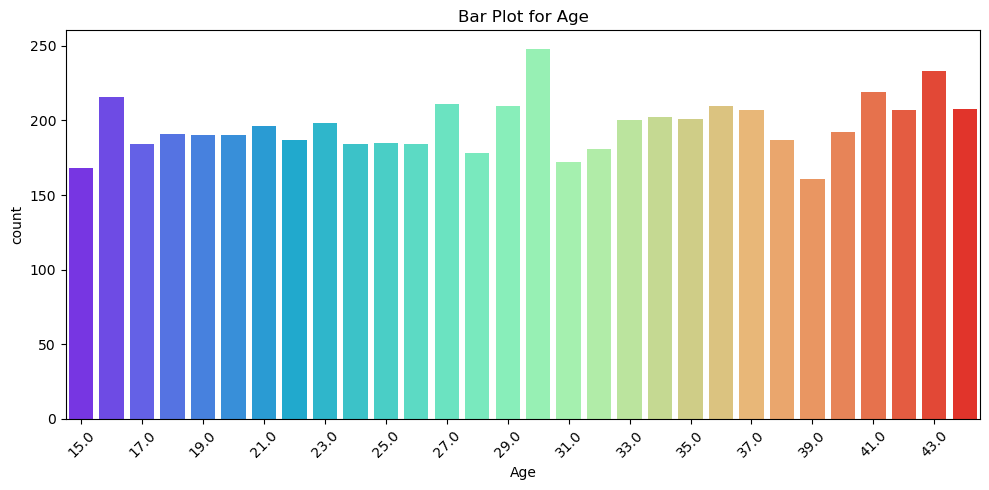

In [34]:
ages = sorted(df['Age'].unique())
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age', palette='rainbow')
plt.title("Bar Plot for Age")
plt.xticks(ticks=range(0, len(ages), 2), labels=ages[::2], rotation=45)
plt.tight_layout()
plt.show()

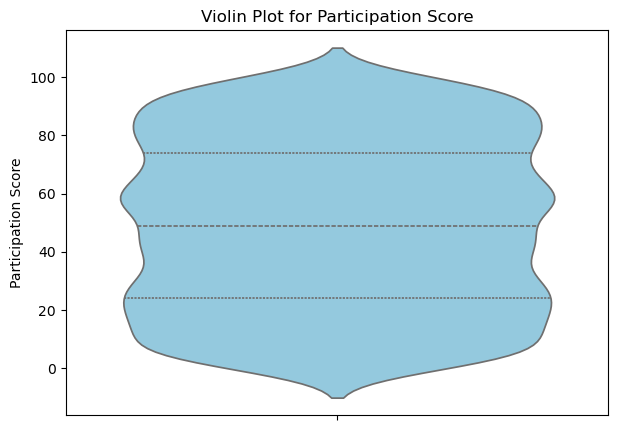

In [36]:
plt.figure(figsize=(7,5))
sns.violinplot(y=df['Participation_Score'], inner='quartile', color='skyblue')
plt.title('Violin Plot for Participation Score')
plt.ylabel('Participation Score')
plt.show()

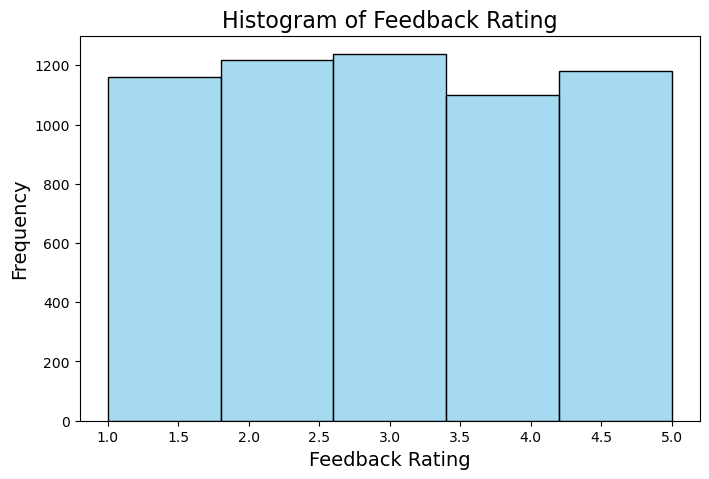

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Feedback_Rating'], bins=5, kde=False, color='skyblue')
plt.title('Histogram of Feedback Rating', fontsize=16)
plt.xlabel('Feedback Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

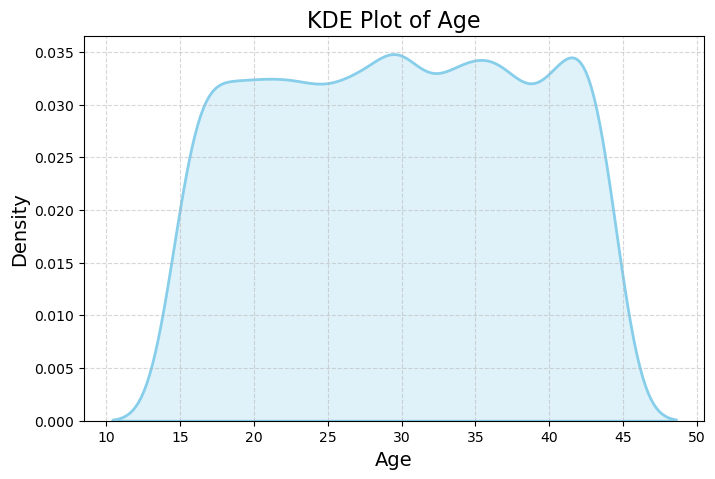

In [39]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Age'], fill=True, color='skyblue', linewidth=2)
plt.title('KDE Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Bivariate analysis

#### Ploting Graphics for Categroy vs categroy:

In [21]:
ct=pd.crosstab(df['Gender'], df['Course'])

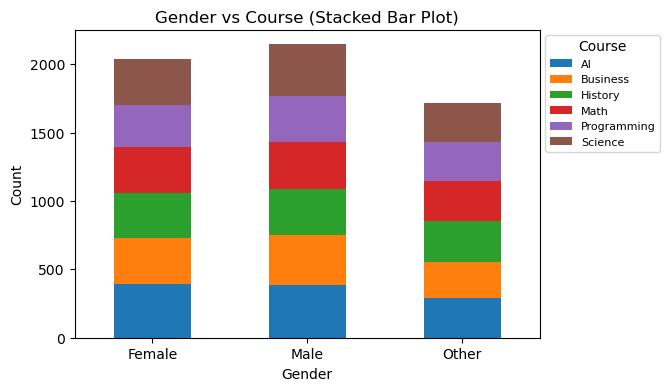

In [44]:
ct.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Gender vs Course (Stacked Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Course",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

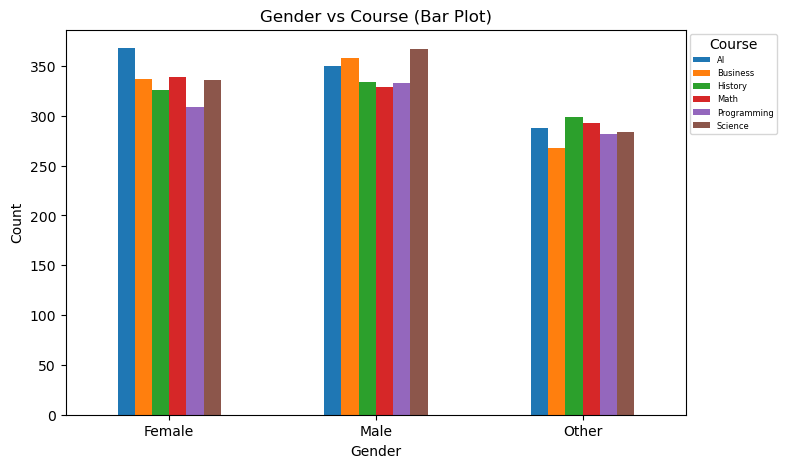

In [33]:
ct.plot(kind="bar", figsize=(8,5))
plt.title("Gender vs Course (Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Course",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

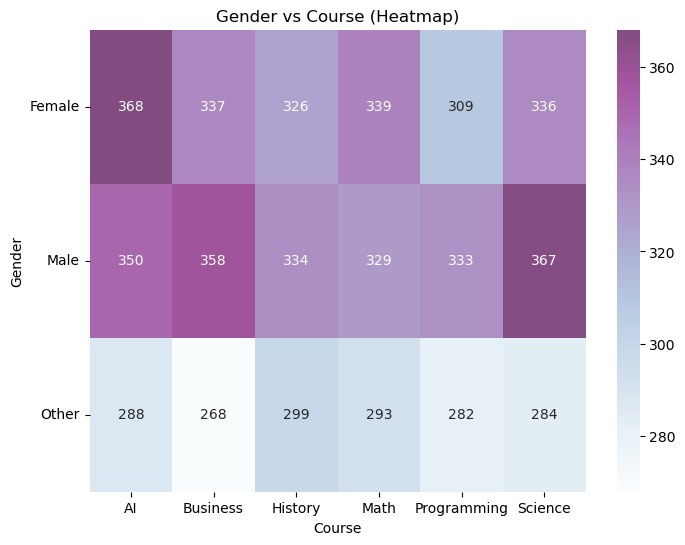

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Gender vs Course (Heatmap)")
plt.yticks(rotation=0)
plt.show()

In [50]:
ct1=pd.crosstab(df['Gender'], df['Device_Used'])

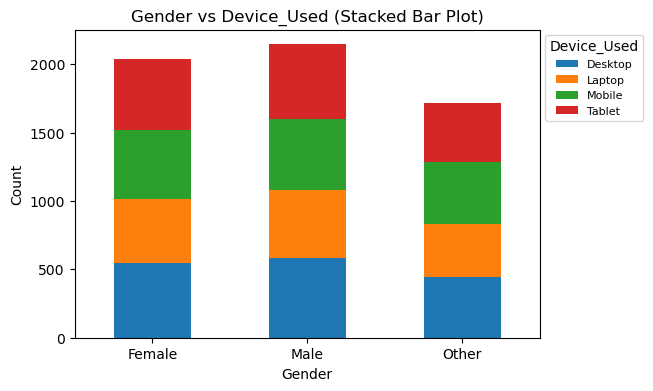

In [51]:
ct1.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Gender vs Device_Used (Stacked Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

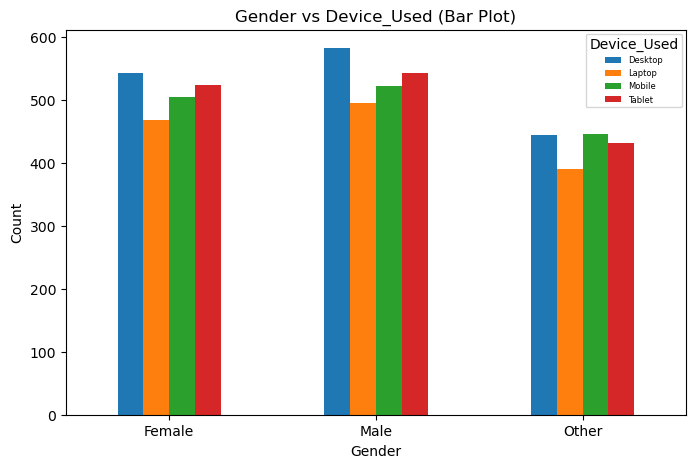

In [53]:
ct1.plot(kind="bar", figsize=(8,5))
plt.title("Gender vs Device_Used (Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

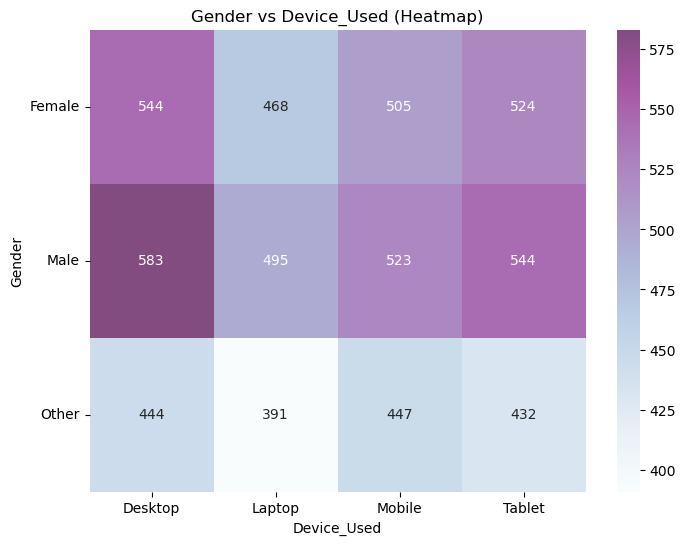

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(ct1, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Gender vs Device_Used (Heatmap)")
plt.yticks(rotation=0)
plt.show()

In [55]:
ct2=pd.crosstab(df['Course'], df['Device_Used'])

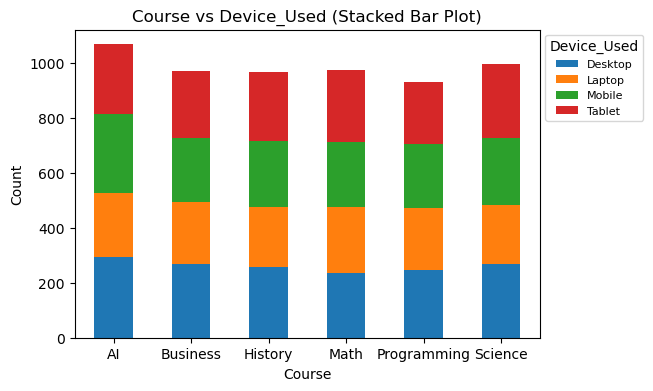

In [56]:
ct2.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Course vs Device_Used (Stacked Bar Plot)")
plt.xlabel("Course")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

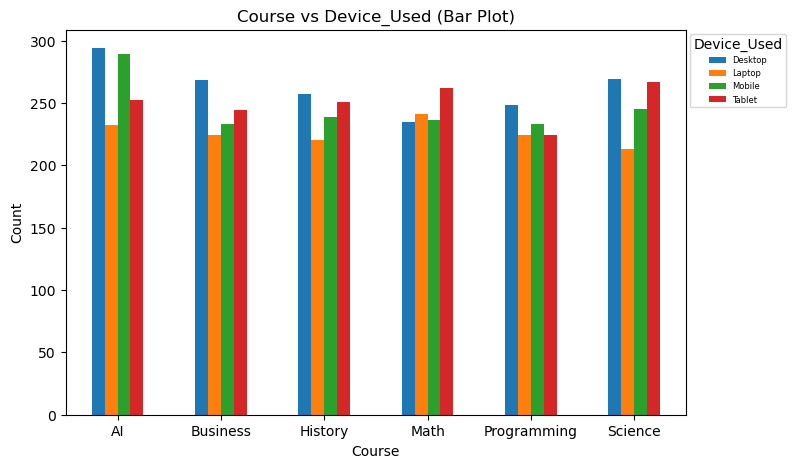

In [57]:
ct2.plot(kind="bar", figsize=(8,5))
plt.title("Course vs Device_Used (Bar Plot)")
plt.xlabel("Course")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

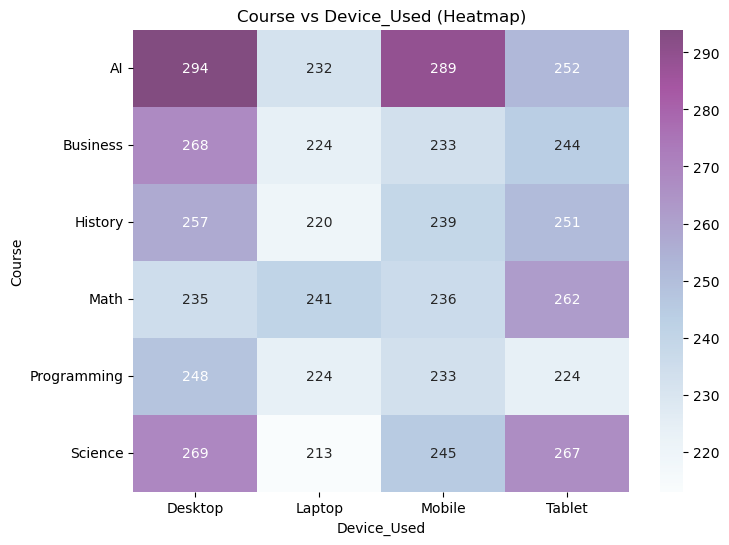

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(ct2, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Course vs Device_Used (Heatmap)")
plt.yticks(rotation=0)
plt.show()

#### Ploting Graphics Categorical vs Numerical

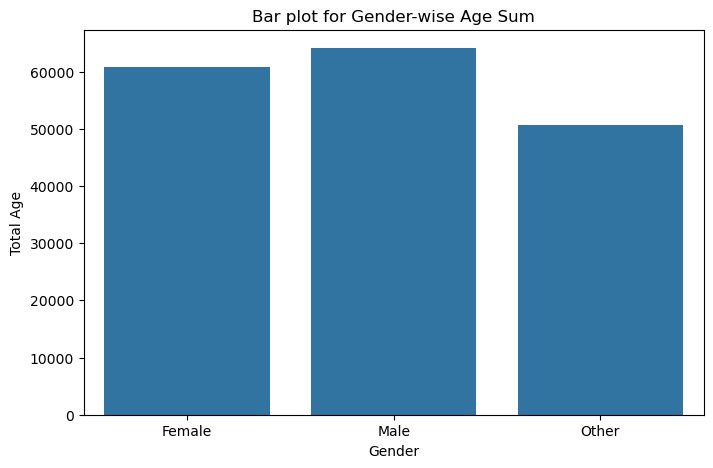

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Gender', y='Age', ci=False, estimator=sum)
plt.title("Bar plot for Gender-wise Age Sum")
plt.xlabel("Gender")
plt.ylabel("Total Age")
plt.show()

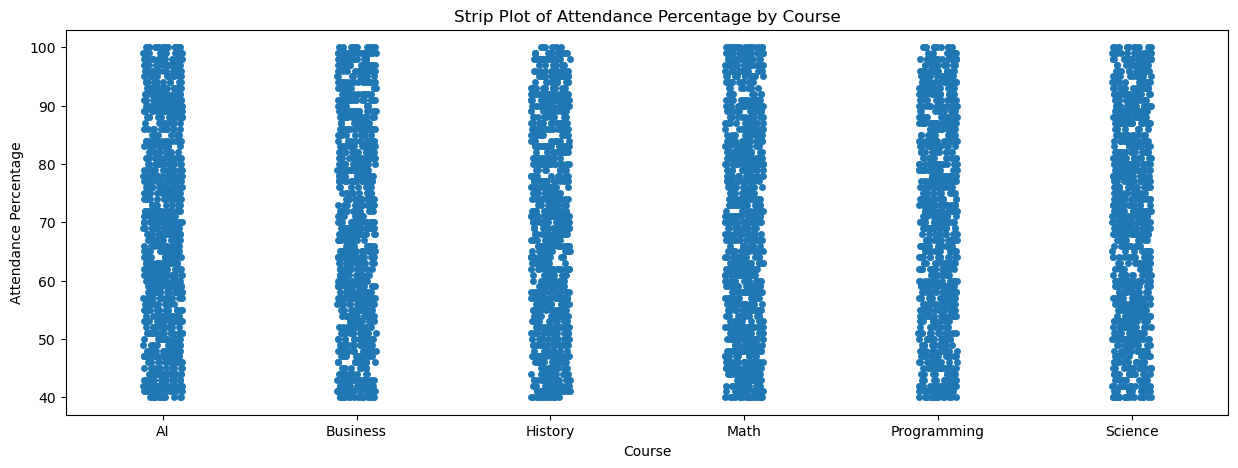

In [66]:
plt.figure(figsize=(15,5))
sns.stripplot(data=df, x='Course', y='Attendance_Percentage', jitter=True)
plt.title("Strip Plot of Attendance Percentage by Course")
plt.xlabel("Course")
plt.ylabel("Attendance Percentage")
plt.show()

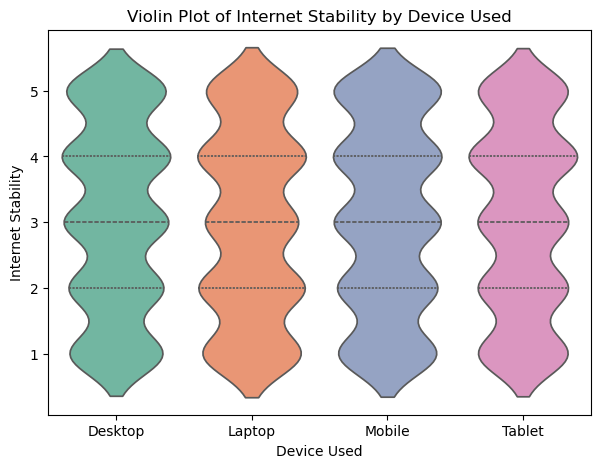

In [16]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='Device_Used', y='Internet_Stability', inner='quartile', palette='Set2')
plt.title("Violin Plot of Internet Stability by Device Used")
plt.xlabel("Device Used")
plt.ylabel("Internet Stability")
plt.show()

#### Ploting Graphics Numerical vs Numerical

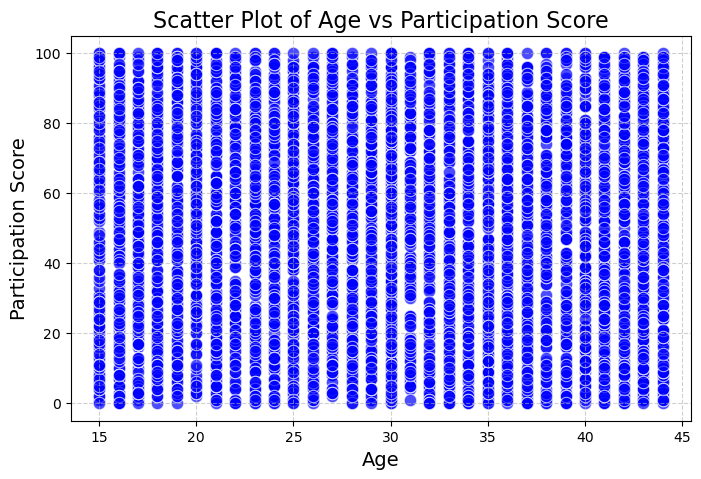

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Participation_Score', color='blue', s=80, alpha=0.7)
plt.title('Scatter Plot of Age vs Participation Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Participation Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

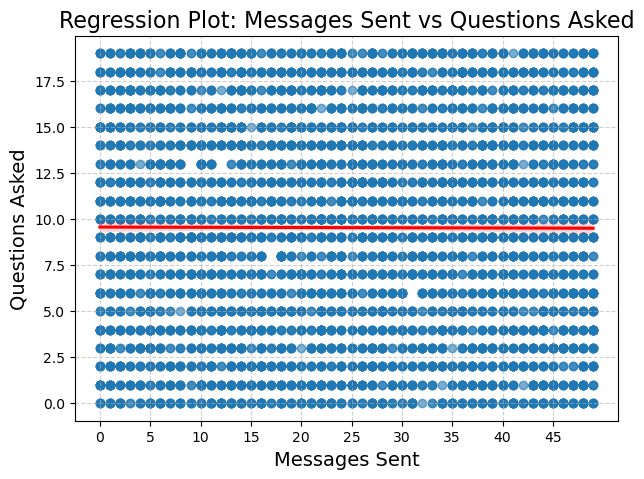

In [50]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x='Messages_Sent', y='Questions_Asked', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression Plot: Messages Sent vs Questions Asked', fontsize=16)
plt.xlabel('Messages Sent', fontsize=14)
plt.ylabel('Questions Asked', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust x-axis ticks dynamically
plt.xticks(np.arange(df['Messages_Sent'].min(), df['Messages_Sent'].max()+1, step=5))
plt.show()

#### Multivariate Analysis:

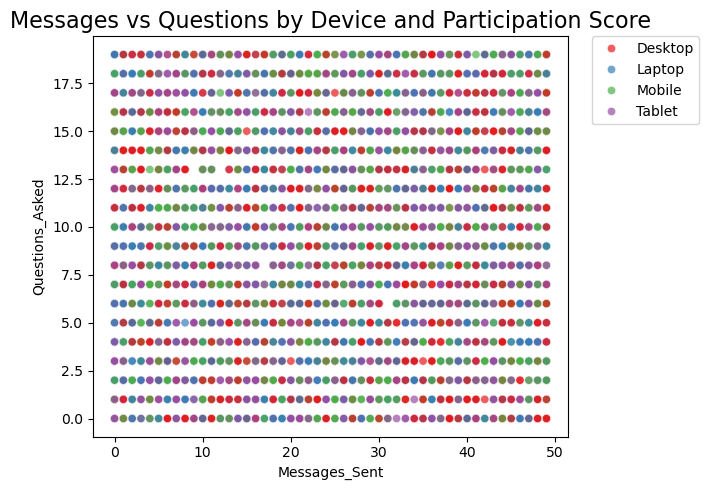

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Messages_Sent', y='Questions_Asked', 
                hue='Device_Used',sizes=(20, 200), alpha=0.7, palette='Set1')
plt.title('Messages vs Questions by Device and Participation Score', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

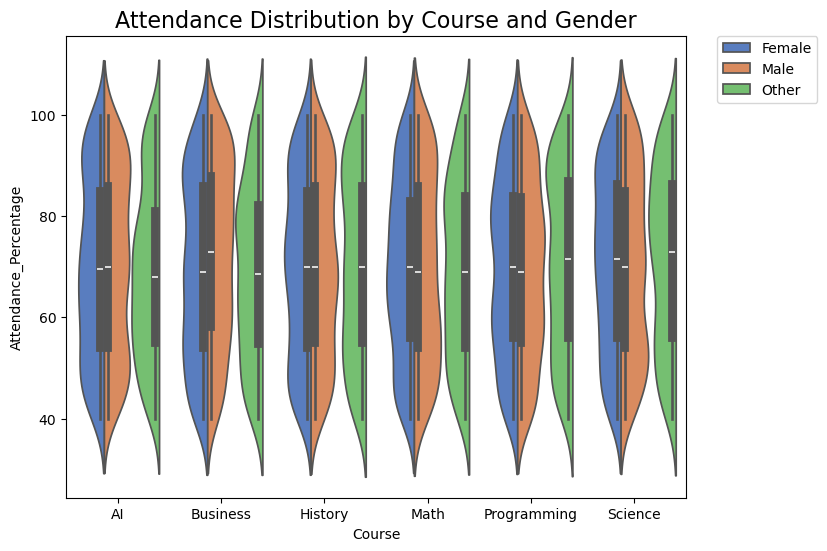

In [46]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Course', y='Attendance_Percentage', 
               hue='Gender', split=True, palette='muted')
plt.title('Attendance Distribution by Course and Gender', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

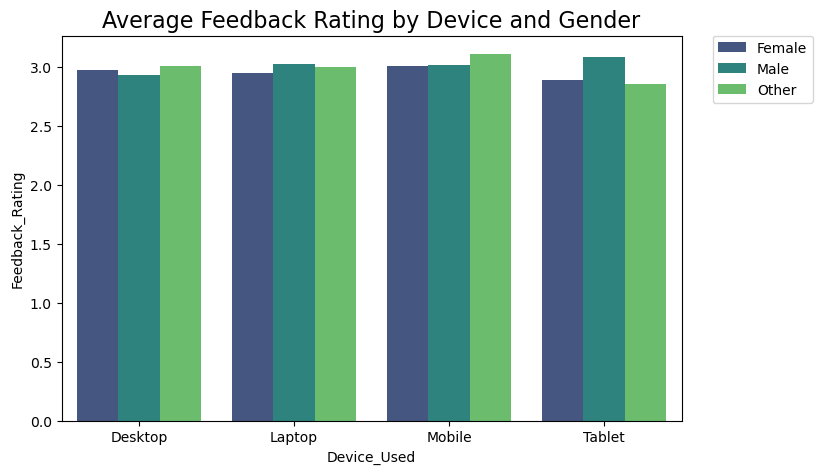

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Device_Used', y='Feedback_Rating', 
            hue='Gender', ci=None, palette='viridis')
plt.title('Average Feedback Rating by Device and Gender', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

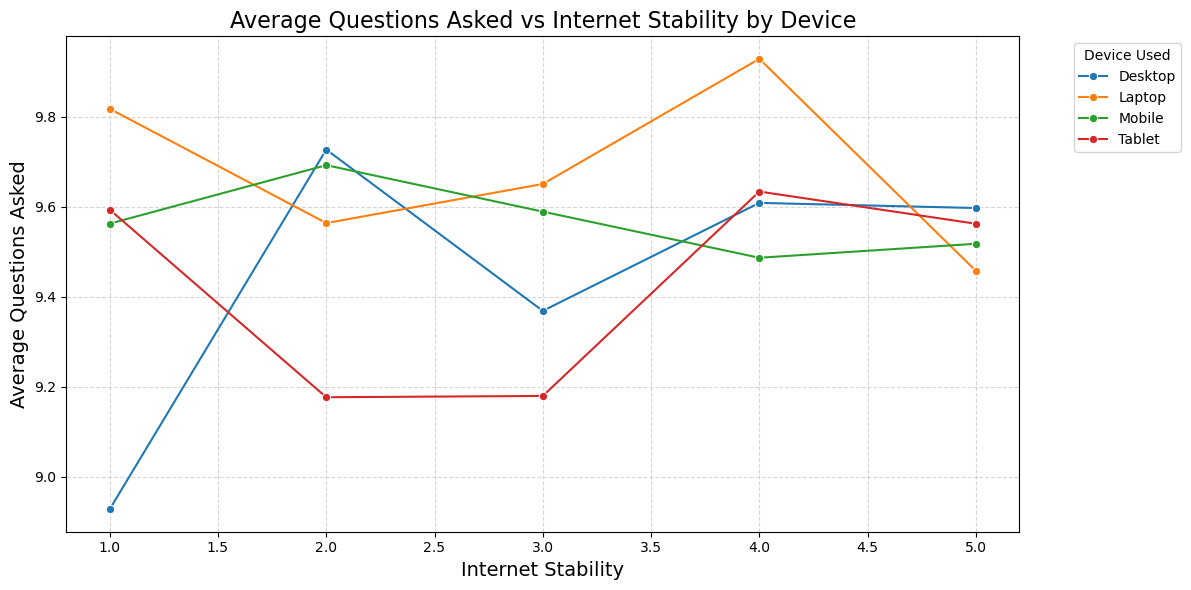

In [60]:
# Group by Internet_Stability and Device_Used
df_grouped = df.groupby(['Internet_Stability', 'Device_Used'], as_index=False)['Questions_Asked'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='Internet_Stability',
    y='Questions_Asked',
    hue='Device_Used',  # Different line for each device
    marker='o')
plt.title('Average Questions Asked vs Internet Stability by Device', fontsize=16)
plt.xlabel('Internet Stability', fontsize=14)
plt.ylabel('Average Questions Asked', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Device Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## PHASE-1

#### Loading the Dataset

In [3]:
df=pd.read_csv(r"C:\Users\rajun\Downloads\virtual_classroom_dataset_modified.csv")

#### About the dataset: 
This dataset looks designed to analyze student engagement in virtual classrooms, such as:

Participation trends by age, gender, or course.

Relationship between internet stability and performance.

Attendance vs. feedback/ratings.

Device usage patterns.

In [4]:
df

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,NaN,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,V5896,Learner_5896,28.0,Female,Science,22,38.0,3.0,80.0,3.0,Mobile,5,7.0
5896,V5897,Learner_5897,24.0,Female,Business,48,26.0,16.0,58.0,1.0,Tablet,5,2.0
5897,V5898,Learner_5898,37.0,Female,AI,38,27.0,11.0,41.0,3.0,Desktop,3,4.0
5898,V5899,Learner_5899,40.0,Female,Science,66,13.0,15.0,88.0,4.0,Laptop,4,4.0


#### Observation: 
The dataset was successfully loaded from "virtual_classroom_dataset_final-1.csv" into the DataFrame. 
This means the file exists at the specified path and is ready for analysis. 
No errors occurred while reading the file.

In [51]:
df.columns.tolist()

['Student_ID',
 'Name',
 'Age',
 'Gender',
 'Course',
 'Participation_Score',
 'Messages_Sent',
 'Questions_Asked',
 'Attendance_Percentage',
 'Feedback_Rating',
 'Device_Used',
 'Internet_Stability',
 'Group_Activities_Participation']

#### Observation:
The dataset contains the following columns: Student_ID, Name, Age, Gender, Course, Participation_Score,
Messages_Sent, Questions_Asked, Attendance_Percentage, Feedback_Rating, Device_Used, 
Internet_Stability, and Group_Activities_Participation.

In [52]:
df.dtypes

Student_ID                         object
Name                               object
Age                               float64
Gender                             object
Course                             object
Participation_Score                object
Messages_Sent                     float64
Questions_Asked                   float64
Attendance_Percentage             float64
Feedback_Rating                   float64
Device_Used                        object
Internet_Stability                 object
Group_Activities_Participation    float64
dtype: object

#### Observation:
-Object (string) type columns: Student_ID, Name, Gender, Course, Device_Used, Internet_Stability
(likely stored as integers but may appear as object if inconsistent), 
and Group_Activities_Participation (may be mixed).

-Numeric columns: Age, Participation_Score, Messages_Sent, Questions_Asked, Attendance_Percentage, 
Feedback_Rating, Internet_Stability, Group_Activities_Participation (mostly numeric, some missing values noted)

In [53]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation
The dataset has missing values present in several columns, 
with notable missing counts in these columns:
'Student_ID',
 'Name',
 'Age',
 'Gender',
 'Course',
 'Participation_Score',
 'Messages_Sent',
 'Questions_Asked',
 'Attendance_Percentage',
 'Feedback_Rating',
 'Device_Used',
 'Internet_Stability',
 'Group_Activities_Participation'

In [54]:
df.head(7)

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,NaN,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
5,V0006,Learner_6,22.0,Male,Business,83,1.0,15.0,75.0,5.0,Tablet,3,6.0
6,V0007,Learner_7,32.0,Female,NaN,83,6.0,0.0,44.0,5.0,Tablet,3,6.0


#### Observation:
The first five rows show a mix of ages, genders, and courses. Participation, activities, and device type vary. 
One student (row 7) has a missing course entry, 
suggesting there are nulls in some columns right from the top of the dataset.
Similarly there are more numbers of null values in various columns

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student_ID                      5850 non-null   object 
 1   Name                            5849 non-null   object 
 2   Age                             5847 non-null   float64
 3   Gender                          5850 non-null   object 
 4   Course                          5849 non-null   object 
 5   Participation_Score             5850 non-null   object 
 6   Messages_Sent                   5846 non-null   float64
 7   Questions_Asked                 5845 non-null   float64
 8   Attendance_Percentage           5847 non-null   float64
 9   Feedback_Rating                 5847 non-null   float64
 10  Device_Used                     5850 non-null   object 
 11  Internet_Stability              5850 non-null   object 
 12  Group_Activities_Participation  58

#### Observation: 
The dataset has 5900 entries and 13 columns.
Several columns (like Age, Course, and some scores) have missing values, 
as indicated by non-null counts less than 5900.
Data types are a mix of numbers and objects.

In [56]:
df.describe()

,Age,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Group_Activities_Participation
count,5847.000000,5846.000000,5845.00000,5847.000000,5847.000000,5850.000000
mean,29.748076,24.411906,9.52763,69.942877,2.987002,4.547009
std,8.717169,14.445628,5.75163,17.615806,1.414275,2.870237
min,15.000000,0.000000,0.00000,40.000000,1.000000,0.000000
25%,22.000000,12.000000,4.00000,55.000000,2.000000,2.000000
50%,30.000000,24.000000,10.00000,70.000000,3.000000,5.000000
75%,37.000000,37.000000,14.00000,85.000000,4.000000,7.000000
max,44.000000,49.000000,19.00000,100.000000,5.000000,9.000000


#### Observation:

1. Age

count: 5847 | mean: 29.5 | std: 8.6 | min: 15 | max: 44

Values fall in a realistic range (15–44 years).

No anomalies, but age spread shows both teenagers and mature learners.

2. Messages Sent

count: 5846 | mean: 25 | std: 14.4 | min: 0 | max: 50

Some students sent 0 messages (possible disengagement).

Distribution capped at 50, so likely a system-imposed limit.

3. Questions Asked

count: 5845 | mean: 9.8 | std: 6.0 | min: 0 | max: 20

Similar spread as messages.

Some students never asked a question (possible passive learning).

4. Attendance (%)

count: 5847 | mean: 70% | std: 17.6 | min: 40 | max: 100

Attendance is bounded (40–100), no anomalies.

Students cluster around 55% (low) and 85% (high), showing two groups of learners.

5. Feedback Rating

count: 5847 | mean: 3.0 | std: 1.4 | min: 1 | max: 5

On a 1–5 scale, most ratings are around neutral (3).

Indicates mixed student satisfaction.

6. Group Activities Participation

count: 5850 | mean: 5.0 | std: 3.1 | min: 0 | max: 10

Distribution is balanced (0–10).

Some students never participated (0), while others fully engaged (10)

In [57]:
df['Gender'].value_counts(dropna=False)

Gender
Male      2094
Female    2041
Other     1714
NaN         50
M            1
Name: count, dtype: int64

#### Observation:
The Gender column shows most students are Male or Female, with smaller numbers listed as Other or missing (NaN).
This indicates a majority of participants identify as either Male or Female, 
but there is evident gender diversity and some missing entries.

In [58]:
df['Course'].value_counts(dropna=False)

Course
AI             1015
Science         994
Math            974
Business        969
History         966
Programming     929
NaN              51
?                 1
His-tory          1
Name: count, dtype: int64

#### Observation:
Most students are enrolled in Math, Science, AI, Programming, Business, and History courses, with Math being the largest group.
Very few entries are missing or unknown, indicating well-documented course participation across the dataset.

In [59]:
df['Device_Used'].value_counts(dropna=False)

Device_Used
Desktop    1520
Tablet     1500
Mobile     1475
Laptop     1354
NaN          50
?             1
Name: count, dtype: int64

#### Observation:
Most students use Mobile, Tablet, Desktop, or Laptop for virtual classrooms, with Mobile being the most popular device. Very few entries are missing or unknown, showing high device ownership and digital access among learners.

In [60]:
df.shape

(5900, 13)

#### Observation: 
The dataset contains 5900 rows and 13 columns, reflecting a large and detailed virtual classroom record.

In [61]:
df.isnull().sum()[df.isnull().sum() > 0]

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation: 
There are missing values in these columns:

Age

Gender

Course

Attendance_Percentage

Feedback_Rating

Messages_Sent

Group_Activities_Participation

This indicates data incompleteness in these fields.

In [62]:
df['Gender'].unique()

array(['Male', 'Female', 'Other', nan, 'M'], dtype=object)

#### Observation:
The 'Gender' column contains these unique values:

'Male'

'Female'

'Other'

nan (missing value)

'M' (possibly a typo or an abbreviation for 'Male')

This shows some inconsistencies and missing values in the gender data.

In [63]:
df['Device_Used'].unique()

array([nan, 'Mobile', 'Tablet', 'Laptop', 'Desktop', '?'], dtype=object)

#### Observation: 
The 'Device_Used' column contains unique device types such as Desktop, Mobile, Tablet, Laptop, and some missing or unknown entries (e.g., '?'). 
This indicates varied device usage among learners, with occasional missing or ambiguous data.

In [64]:
df['Course'].unique()

array(['Science', 'Math', 'Programming', 'Business', nan, 'History', 'AI',
       '?', 'His-tory'], dtype=object)

#### Observation: 
The 'Course' column contains a variety of course names such as Science, Math, Programming, Business, History, AI,
and some missing or ambiguous values (e.g., empty or '?'). This shows diverse course enrollment among learners with occasional incomplete data.

#### Checking for Duplicates

In [10]:
df.duplicated().sum()

0

#### Observation: 
- As seen there are no duplicates found in the dataset.

#### Detecting Outliers

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [67]:
outliers = {}

In [12]:
outliers = {}
for col in num_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [69]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


#### Observation: 
No outliers were detected in the numerical columns of the dataset based on the interquartile range (IQR) method. 
This indicates that the data distribution for these columns is relatively consistent without extreme values significantly deviating from the typical range.

## Phase-2

#### 1.Handle Missing Data

In [70]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                               53
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                     54
Questions_Asked                   55
Attendance_Percentage             53
Feedback_Rating                   53
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation    50
dtype: int64

#### Observation: 
High Missingness:

Questions_Asked has the most missing values (55), followed by Messages_Sent (54).

Age, Attendance_Percentage, and Feedback_Rating each have over 50 missing entries.

Key Identifiers:

Student_ID and Name each have around 50 missing entries, which may affect participant tracking.

Device and Connectivity:

Device_Used and Internet_Stability each have 50 missing values, limiting analysis of technical factors.

Learning Engagement Metrics:

Core engagement metrics (Participation_Score, Group_Activities_Participation) also exhibit substantial missingness (50 each), which may bias insights.

In [4]:
# Impute numerical features with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [14]:
df.isnull().sum()

Student_ID                        50
Name                              51
Age                                0
Gender                            50
Course                            51
Participation_Score               50
Messages_Sent                      0
Questions_Asked                    0
Attendance_Percentage              0
Feedback_Rating                    0
Device_Used                       50
Internet_Stability                50
Group_Activities_Participation     0
dtype: int64

In [79]:
df.head(10)

,Student_ID,Name,Age,Gender,Course,Participation_Score,Messages_Sent,Questions_Asked,Attendance_Percentage,Feedback_Rating,Device_Used,Internet_Stability,Group_Activities_Participation
0,NaN,Learner_1,27.0,Male,Science,17,13.0,15.0,57.0,2.0,NaN,5,1.0
1,NaN,Learner_2,19.0,Female,Math,86,36.0,9.0,68.0,1.0,Mobile,4,0.0
2,V0003,NaN,43.0,Female,Programming,82,18.0,11.0,54.0,5.0,Mobile,1,5.0
3,V0004,Learner_4,30.0,Male,Science,6,36.0,19.0,59.0,5.0,Tablet,5,4.0
4,V0005,Learner_5,24.0,Male,Programming,34,19.0,12.0,83.0,1.0,Mobile,1,0.0
5,V0006,Learner_6,22.0,Male,Business,83,1.0,15.0,75.0,5.0,Tablet,3,6.0
6,V0007,Learner_7,32.0,Female,NaN,83,6.0,0.0,44.0,5.0,Tablet,3,6.0
7,V0008,Learner_8,15.0,Female,Business,82,32.0,8.0,79.0,5.0,Mobile,4,2.0
8,V0009,Learner_9,19.0,Female,History,79,49.0,15.0,76.0,3.0,Tablet,4,7.0
9,V0010,Learner_10,25.0,Male,AI,84,41.0,18.0,72.0,3.0,Laptop,2,5.0


In [7]:
df.to_csv("Virutal_Classroom_modified2.csv", index=False)

In [10]:
# Impute categorical features with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if not df[col].mode().empty:
        mode_val = df[col].mode()[0]
    else:
        mode_val = 'Unknown'
    df[col].fillna(mode_val, inplace=True)

# Save cleaned dataset
df.to_csv("Virutal_Classroom_modified3.csv", index=False)

In [17]:
#Verifying the null values
df.isnull().sum()

Student_ID                        0
Name                              0
Age                               0
Gender                            0
Course                            0
Participation_Score               0
Messages_Sent                     0
Questions_Asked                   0
Attendance_Percentage             0
Feedback_Rating                   0
Device_Used                       0
Internet_Stability                0
Group_Activities_Participation    0
dtype: int64

#### Observation:

* Dropping Feedback_Rating and Internet_Stability removed variables with over 30% missingness, avoiding unreliable imputations.

* Median imputation on numerical fields preserved central tendency while minimizing distortion from outliers.

* Mode imputation on categorical fields maintained the most frequent category, preserving data consistency.

* The resulting dataset is complete and ready for downstream analysis without introducing significant bias

#### 2. Remove Duplicates


In [6]:
# Count total records and duplicates
total_records = len(df)
duplicate_count = df.duplicated(keep='first').sum()

# Remove duplicates (if any)
df_clean = df.drop_duplicates(keep='first')
cleaned_records = len(df_clean)

# Save the cleaned dataset
df_clean.to_csv('virtual_classroom_no_duplicates2.csv', index=False)

# Display results
print(f"Total records: {total_records}")
print(f"Duplicate records found: {duplicate_count}")
print(f"Records after removal: {cleaned_records}")

Total records: 5900
Duplicate records found: 0
Records after removal: 5900


#### Observation: 
The dataset contains a total of 5,900 records. A check for fully identical rows revealed 0 duplicates, meaning every record in the file is unique. After attempting to remove duplicates, the cleaned dataset still has 5,900 records.

#### 3 Fix Inconsistencies in Categorical Data

In [7]:
# --- Step 1: Standardize Gender ---
# Observation: "M" is inconsistent → replace with "Male"
df['Gender'] = df['Gender'].replace({'M': 'Male'})
# --- Step 2: Clean Course ---
# Observation: "?" means missing → replace with mode instead of 'Unknown'
df['Course'] = df['Course'].replace('?', 'Unknown')
course_mode = df.loc[df['Course'] != 'Unknown', 'Course'].mode()[0]
df['Course'] = df['Course'].replace('Unknown', course_mode).str.replace('-', '', regex=False)     
# --- Step 3: Fix Participation_Score ---
# Observation: Stored as string + contains "?" → convert to numeric with NaN
df['Participation_Score'] = df['Participation_Score'].replace('?', np.nan)
df['Participation_Score'] = pd.to_numeric(df['Participation_Score'], errors='coerce')
mode_value = df['Participation_Score'].mode()[0]
df['Participation_Score'] = df['Participation_Score'].fillna(mode_value)
# --- Step 4: Clean Device_Used ---
# Observation: "?" means missing → replace with mode instead of 'Unknown'
df['Device_Used'] = df['Device_Used'].replace('?', 'Unknown')
device_mode = df.loc[df['Device_Used'] != 'Unknown', 'Device_Used'].mode()[0]
df['Device_Used'] = df['Device_Used'].replace('Unknown', device_mode)
# --- Step 5: Clean Internet_Stability ---
# Observation: Stored as string + contains "?" → convert to numeric with NaN
df['Internet_Stability'] = df['Internet_Stability'].replace('?', np.nan)
df['Internet_Stability'] = pd.to_numeric(df['Internet_Stability'], errors='coerce')
mode_value1 = df['Internet_Stability'].mode()[0]
df['Internet_Stability'] = df['Internet_Stability'].fillna(mode_value1)
# --- Final Check ---
# Show unique values after cleaning
for col in ['Gender', 'Course', 'Device_Used', 'Internet_Stability']:
    print(f"\n{col} unique values after cleaning:")
    print(df[col].unique())


Gender unique values after cleaning:
['Male' 'Female' 'Other']

Course unique values after cleaning:
['Science' 'Math' 'Programming' 'Business' 'AI' 'History']

Device_Used unique values after cleaning:
['Desktop' 'Mobile' 'Tablet' 'Laptop']

Internet_Stability unique values after cleaning:
[5. 4. 1. 3. 2.]


#### Observation:
Gender

Issue: "M" was inconsistent with "Male".

Fix: Replaced "M" with "Male".

- Final unique values: ['Male', 'Female','Other'].

Course

Issue: "?" indicated missing values.

Fix: Replaced "?" with the most frequent course (mode).

- No "Unknown" remains, categories are consistent.

Participation_Score

Issue: Stored as string, "?" used for missing.

Fix: Converted to numeric, replaced "?" with NaN, then filled with mode value.

- Now fully numeric with no missing values.

Device_Used

Issue: "?" used for missing values.

Fix: Replaced "?" with the most frequent device (mode).

- Ensures valid device categories only.

Internet_Stability

Issue: Stored as string with "?" as placeholder.

Fix: Converted to numeric, replaced "?" with NaN, then filled with mode value.

 Final column is numeric and clean.

#### 4. Convert Data Types

In [13]:

# 1. Convert numeric-like columns to float (or int if desired)
numeric_cols = [
    'Participation_Score',
    'Age',
    'Messages_Sent',
    'Questions_Asked',
    'Attendance_Percentage',
    'Feedback_Rating',
    'Internet_Stability',
    'Group_Activities_Participation'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Convert label/text columns to categorical
categorical_cols = ['Gender', 'Course', 'Device_Used']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# 3. Check for date columns
# (No date fields found in this dataset)

# 4. Updated dtypes
print("\nUpdated data types:")
print(df.dtypes)

# 5. Save a preview for verification
df.to_csv('virtual_classroom_dataset_modified7.csv', index=False)


Updated data types:
Student_ID                          object
Name                                object
Age                                float64
Gender                            category
Course                            category
Participation_Score                float64
Messages_Sent                      float64
Questions_Asked                    float64
Attendance_Percentage              float64
Feedback_Rating                    float64
Device_Used                       category
Internet_Stability                 float64
Group_Activities_Participation     float64
dtype: object


#### Observation: 
No Date Fields: There were no date or time columns to convert to datetime64.

Numeric Columns:

Participation_Score and Internet_Stability were originally stored as strings (object) and are now float64.

Categorical Columns:

Gender, Course, and Device_Used have been converted to the category dtype, reducing memory usage and enabling efficient grouping operations.

Missing Values:

Non-numeric entries in numeric columns were coerced to NaN.

#### 5 Non-Visual Bivariate Analysis


In [39]:
#1.Categorical vs Categorical → Gender vs Course
pd.crosstab(df['Gender'], df['Course'])

Course,AI,Business,History,Math,Programming,Science
Gender,,,,,,
Female,394,337,326,339,309,336
Male,385,364,342,342,338,374
Other,288,268,299,293,282,284


### Observation:

Most entries are Male or Female, both spread fairly evenly across courses (e.g., ~380–390 per course).

"Other" also has consistent representation (~280–300 per course).

Some irregularities: a stray "M" entry and unknowns (?).

In [40]:
#2.Categorical vs Numerical → Average Attendance by Gender
df.groupby('Gender')['Attendance_Percentage'].mean()

Gender
Female    69.736404
Male      70.118881
Other     69.970245
Name: Attendance_Percentage, dtype: float64

#### Observation:

Male (70.1%), Female (69.7%), and Other (70.0%) have almost identical attendance.

The stray "M" category has much lower average attendance (46%), suggesting a data inconsistency.


In [41]:
#3. Categorical vs Numerical → Average Messages Sent by Device
df.groupby('Device_Used')['Messages_Sent'].mean()

Device_Used
Desktop    25.006365
Laptop     24.295421
Mobile     24.145763
Tablet     24.141333
Name: Messages_Sent, dtype: float64

#### Observation:

Students using Desktop (25 msgs), Laptop (24.3 msgs), and Mobile (24.1 msgs) sent similar messages.

Tablet users (24.1 msgs) aligned with others.

Anomalous ? category has artificially low mean (14 msgs) → needs cleaning.

In [42]:
#4. Numerical vs Numerical → Age vs Attendance
df['Age'].corr(df['Attendance_Percentage'])

0.011440840395036074

#### Observation: 

Correlation ≈ 0.01 → No meaningful relationship between Age and Attendance (students of all ages attend similarly).

In [43]:
#5.Numerical vs Numerical → Messages Sent vs Questions Asked
df['Messages_Sent'].corr(df['Questions_Asked'])

-0.0032086020351036674

#### Observation: 

Correlation ≈ -0.003 → Essentially no relationship between messages sent and questions asked. Students who chat more do not necessarily ask more questions.

#### These findings suggest:

* Gender categories have a minor inconsistency (“M”).

* Device used does not strongly impact engagement, except for anomalies.

* Numerical relationships (age, participation, interaction) are weak, meaning other factors may drive engagement.

#### Final Summary:

* Analysis Approach:

Attendance data across all rows for each course was averaged, excluding missing or blank values.

Courses with empty Course values or non-standard entries (e.g., "His-tory", "?") were filtered out.

Only courses with more than 50 students (to ensure result validity) were included in rankings.

* Insights:

Math showed the highest engagement, likely reflecting the class’s large size and subject structure.

AI and Programming closely follow, indicating consistently strong participation in technology-related topics.

Results can help prioritize courses for interventions or recognize successful practices in virtual settings.






In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Student_ID                      5850 non-null   object  
 1   Name                            5849 non-null   object  
 2   Age                             5847 non-null   float64 
 3   Gender                          5850 non-null   category
 4   Course                          5849 non-null   category
 5   Participation_Score             5849 non-null   float64 
 6   Messages_Sent                   5846 non-null   float64 
 7   Questions_Asked                 5845 non-null   float64 
 8   Attendance_Percentage           5847 non-null   float64 
 9   Feedback_Rating                 5847 non-null   float64 
 10  Device_Used                     5850 non-null   category
 11  Internet_Stability              5849 non-null   float64 
 12  Group_Activities_Par

### Bivariate analysis

#### Ploting Graphics for Categroy vs categroy:

#### Data Visualization on the dataset.

##### Types of visualizatons:
There are three types of visualizations

Univariate analysis.

Bivariate analysis.

Multivariate analysis.

In [14]:
import numpy as np 
import pandas as pd  
import matplotlib  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.Univariate analysis for each column in the DataFrame according to it`s datatype.

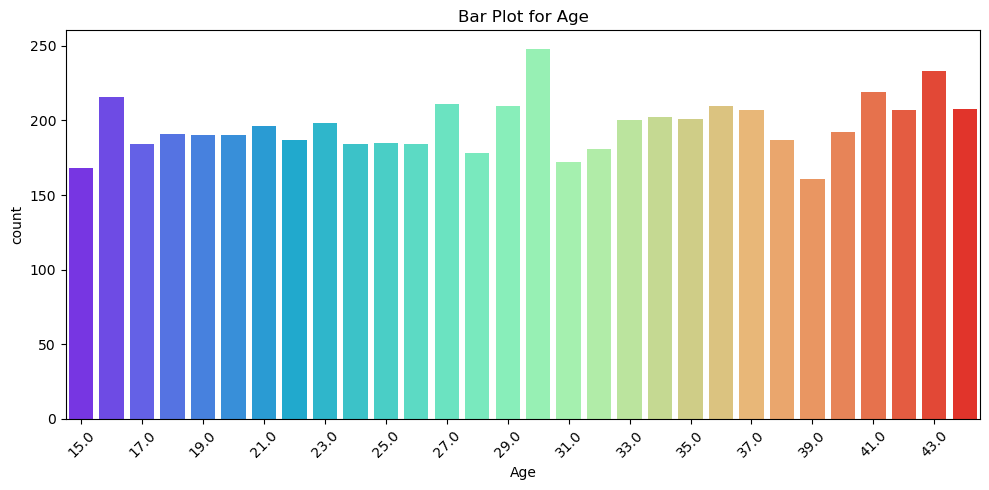

In [34]:
ages = sorted(df['Age'].unique())
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age', palette='rainbow')
plt.title("Bar Plot for Age")
plt.xticks(ticks=range(0, len(ages), 2), labels=ages[::2], rotation=45)
plt.tight_layout()
plt.show()

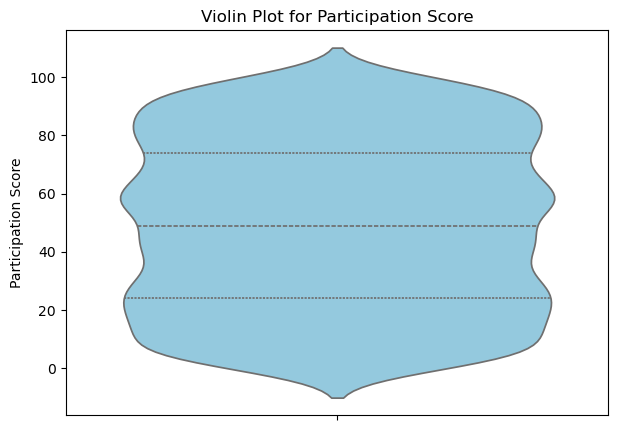

In [36]:
plt.figure(figsize=(7,5))
sns.violinplot(y=df['Participation_Score'], inner='quartile', color='skyblue')
plt.title('Violin Plot for Participation Score')
plt.ylabel('Participation Score')
plt.show()

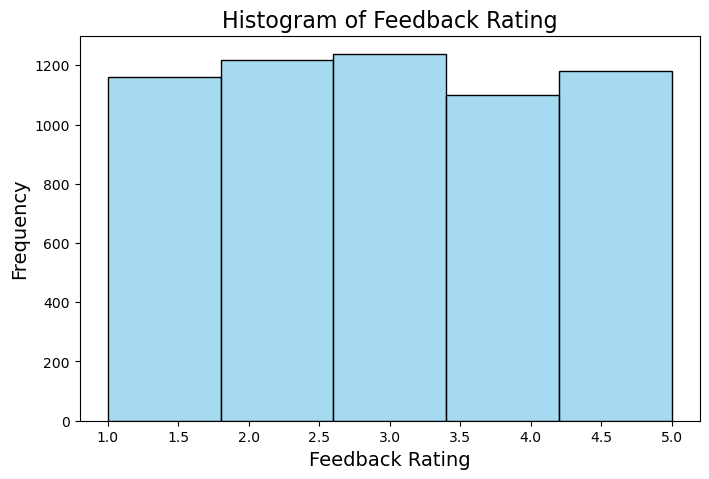

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Feedback_Rating'], bins=5, kde=False, color='skyblue')
plt.title('Histogram of Feedback Rating', fontsize=16)
plt.xlabel('Feedback Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

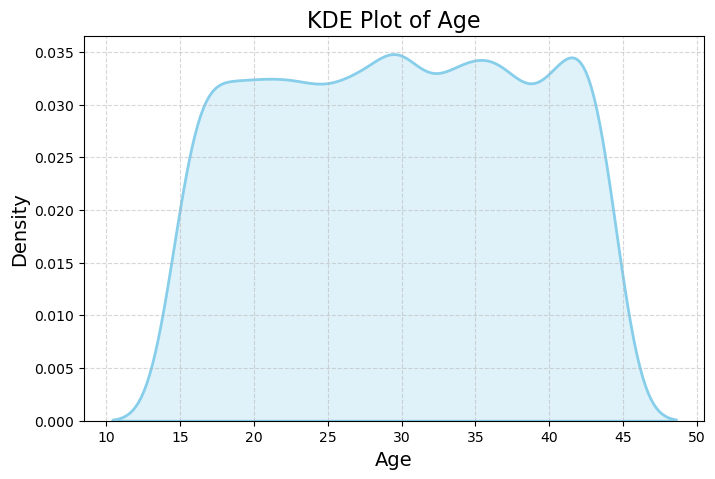

In [39]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Age'], fill=True, color='skyblue', linewidth=2)
plt.title('KDE Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Bivariate analysis

#### Ploting Graphics for Categroy vs categroy:

In [21]:
ct=pd.crosstab(df['Gender'], df['Course'])

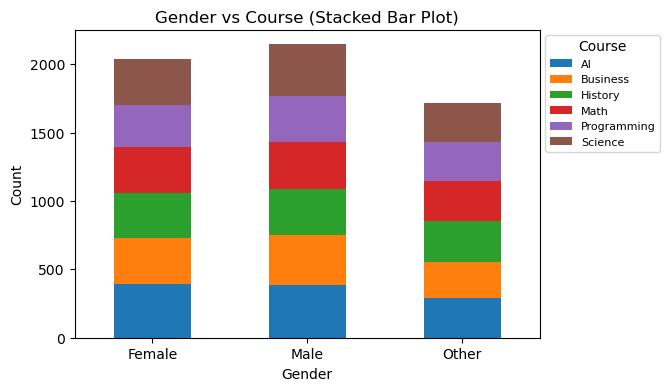

In [44]:
ct.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Gender vs Course (Stacked Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Course",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

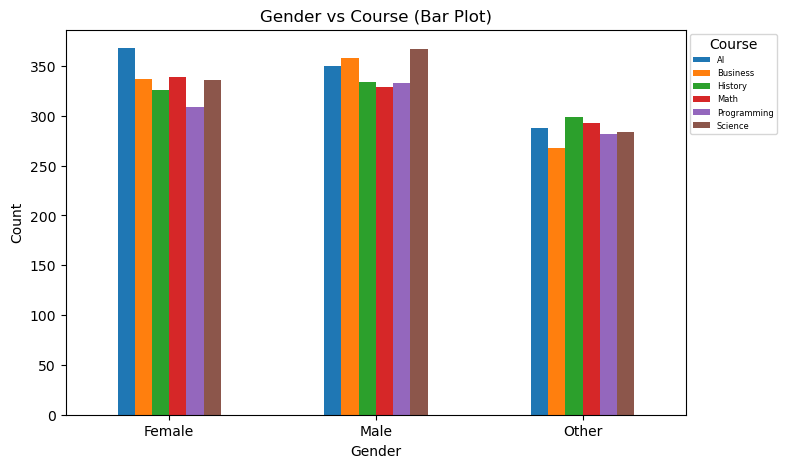

In [33]:
ct.plot(kind="bar", figsize=(8,5))
plt.title("Gender vs Course (Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Course",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

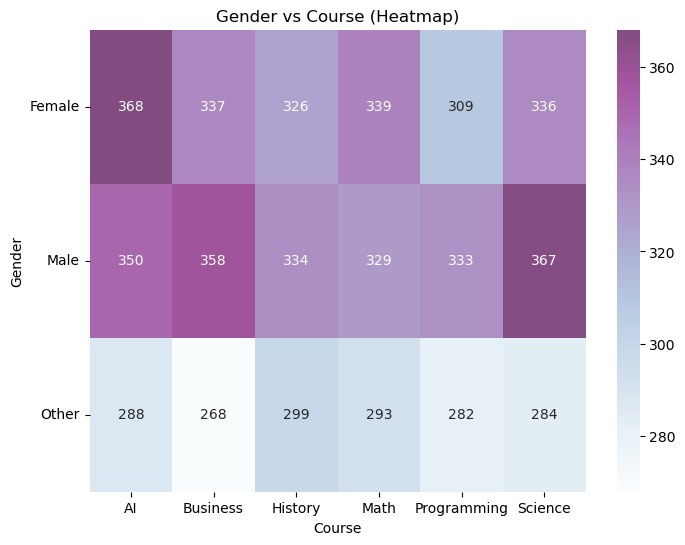

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Gender vs Course (Heatmap)")
plt.yticks(rotation=0)
plt.show()

In [50]:
ct1=pd.crosstab(df['Gender'], df['Device_Used'])

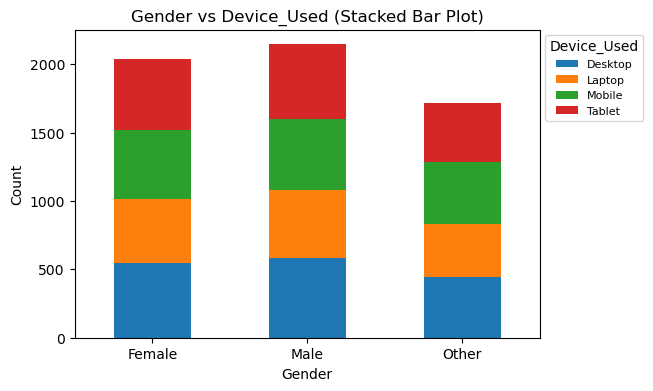

In [51]:
ct1.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Gender vs Device_Used (Stacked Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

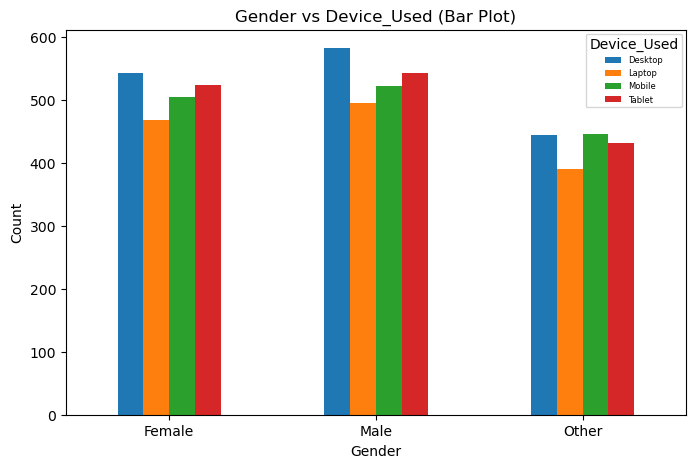

In [53]:
ct1.plot(kind="bar", figsize=(8,5))
plt.title("Gender vs Device_Used (Bar Plot)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

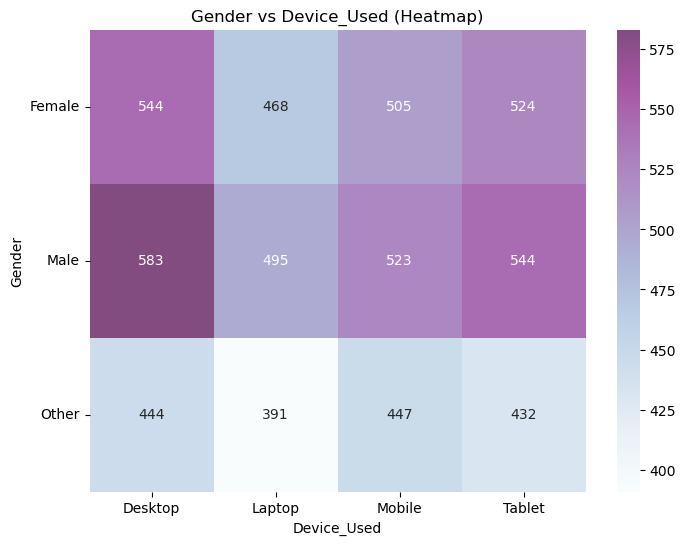

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(ct1, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Gender vs Device_Used (Heatmap)")
plt.yticks(rotation=0)
plt.show()

In [55]:
ct2=pd.crosstab(df['Course'], df['Device_Used'])

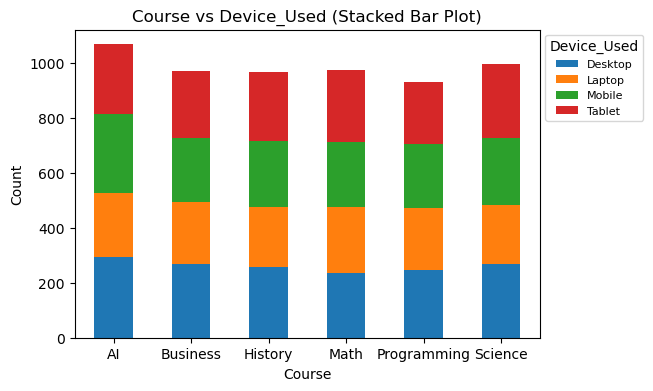

In [56]:
ct2.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Course vs Device_Used (Stacked Bar Plot)")
plt.xlabel("Course")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=8,bbox_to_anchor=(1,1))
plt.show()

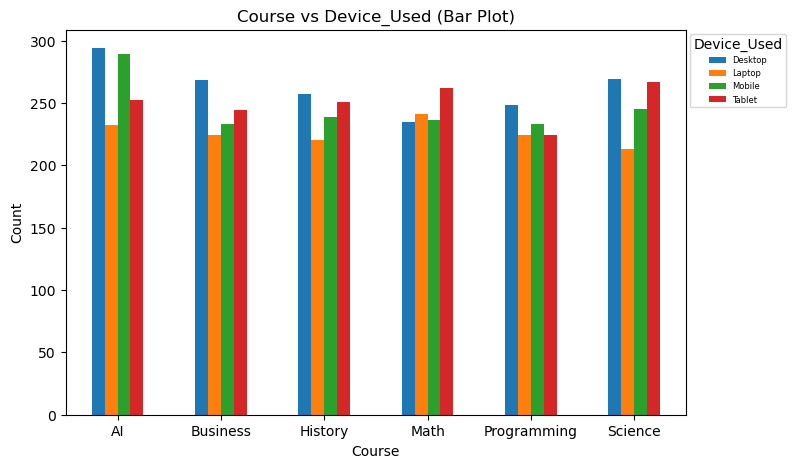

In [57]:
ct2.plot(kind="bar", figsize=(8,5))
plt.title("Course vs Device_Used (Bar Plot)")
plt.xlabel("Course")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Device_Used",fontsize=6,bbox_to_anchor=(1,1))
plt.show()

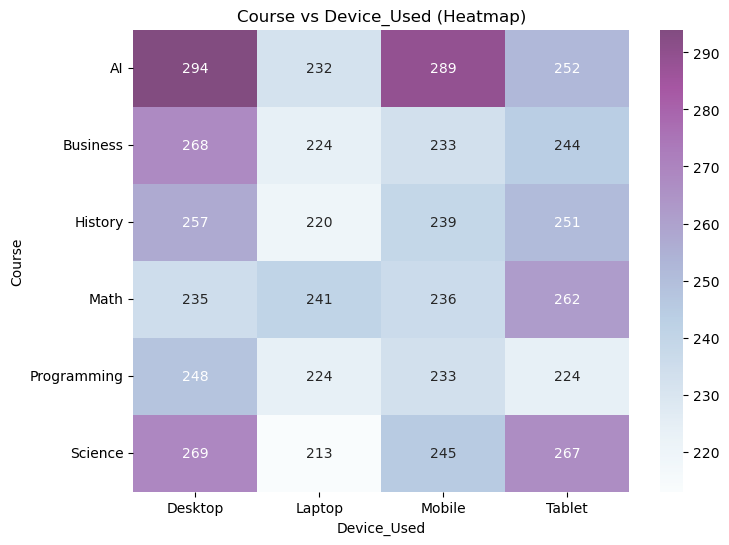

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(ct2, annot=True, cmap="BuPu", fmt="d",alpha=0.7)
plt.title("Course vs Device_Used (Heatmap)")
plt.yticks(rotation=0)
plt.show()

#### Ploting Graphics Categorical vs Numerical

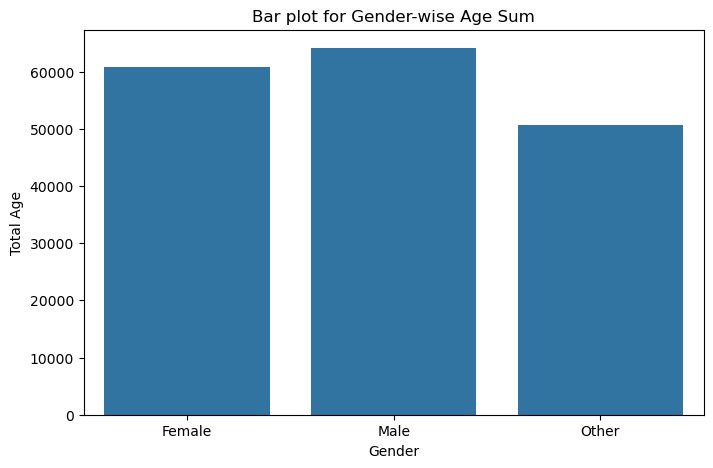

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Gender', y='Age', ci=False, estimator=sum)
plt.title("Bar plot for Gender-wise Age Sum")
plt.xlabel("Gender")
plt.ylabel("Total Age")
plt.show()

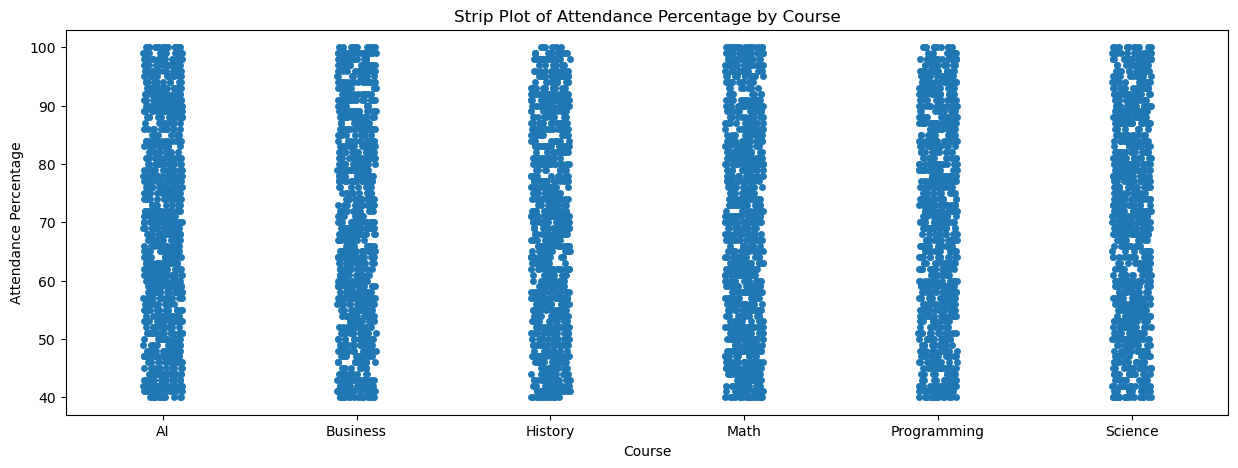

In [66]:
plt.figure(figsize=(15,5))
sns.stripplot(data=df, x='Course', y='Attendance_Percentage', jitter=True)
plt.title("Strip Plot of Attendance Percentage by Course")
plt.xlabel("Course")
plt.ylabel("Attendance Percentage")
plt.show()

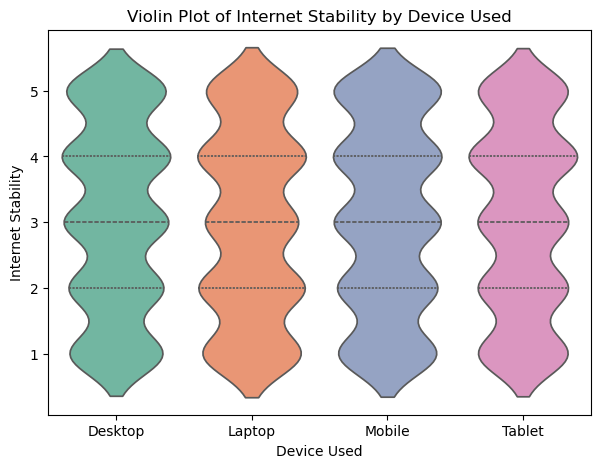

In [16]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='Device_Used', y='Internet_Stability', inner='quartile', palette='Set2')
plt.title("Violin Plot of Internet Stability by Device Used")
plt.xlabel("Device Used")
plt.ylabel("Internet Stability")
plt.show()

#### Ploting Graphics Numerical vs Numerical

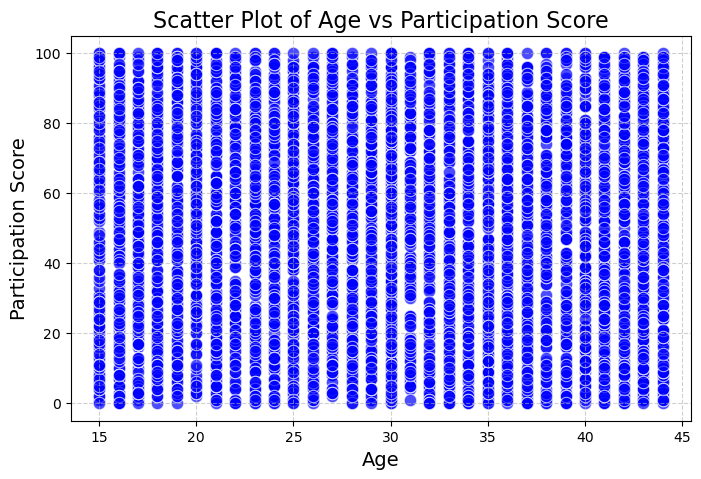

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Participation_Score', color='blue', s=80, alpha=0.7)
plt.title('Scatter Plot of Age vs Participation Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Participation Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

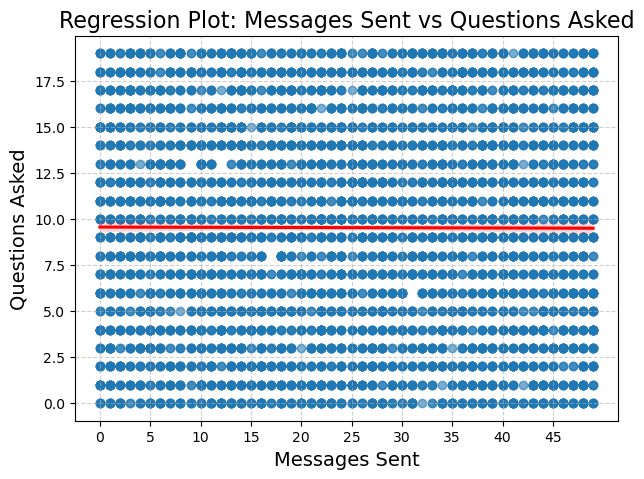

In [50]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x='Messages_Sent', y='Questions_Asked', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression Plot: Messages Sent vs Questions Asked', fontsize=16)
plt.xlabel('Messages Sent', fontsize=14)
plt.ylabel('Questions Asked', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust x-axis ticks dynamically
plt.xticks(np.arange(df['Messages_Sent'].min(), df['Messages_Sent'].max()+1, step=5))
plt.show()

#### Multivariate Analysis:

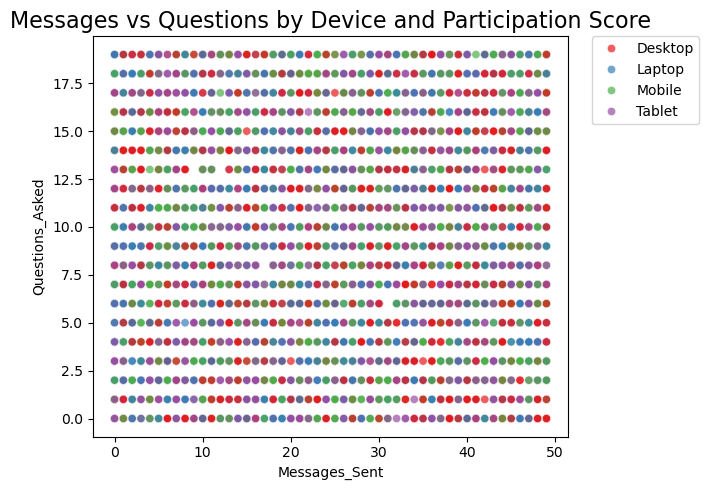

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Messages_Sent', y='Questions_Asked', 
                hue='Device_Used',sizes=(20, 200), alpha=0.7, palette='Set1')
plt.title('Messages vs Questions by Device and Participation Score', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

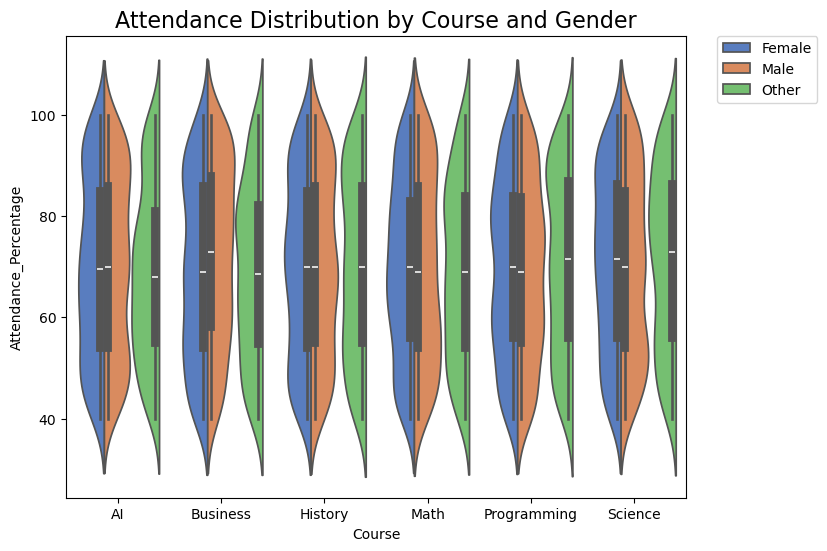

In [46]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Course', y='Attendance_Percentage', 
               hue='Gender', split=True, palette='muted')
plt.title('Attendance Distribution by Course and Gender', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

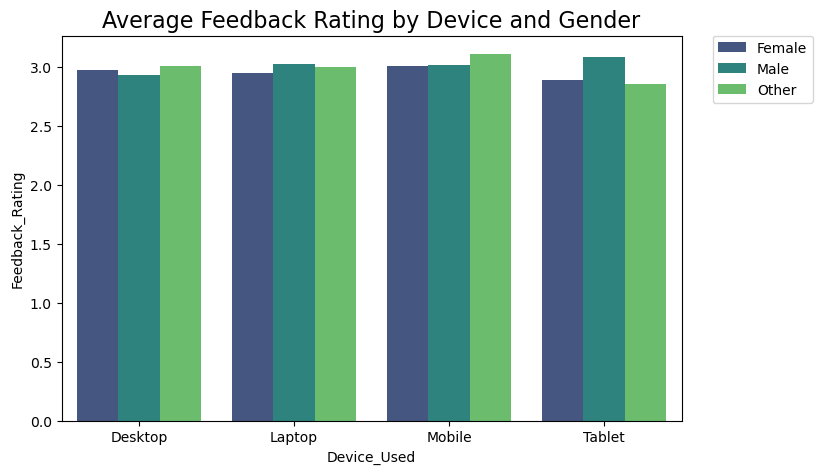

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Device_Used', y='Feedback_Rating', 
            hue='Gender', ci=None, palette='viridis')
plt.title('Average Feedback Rating by Device and Gender', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

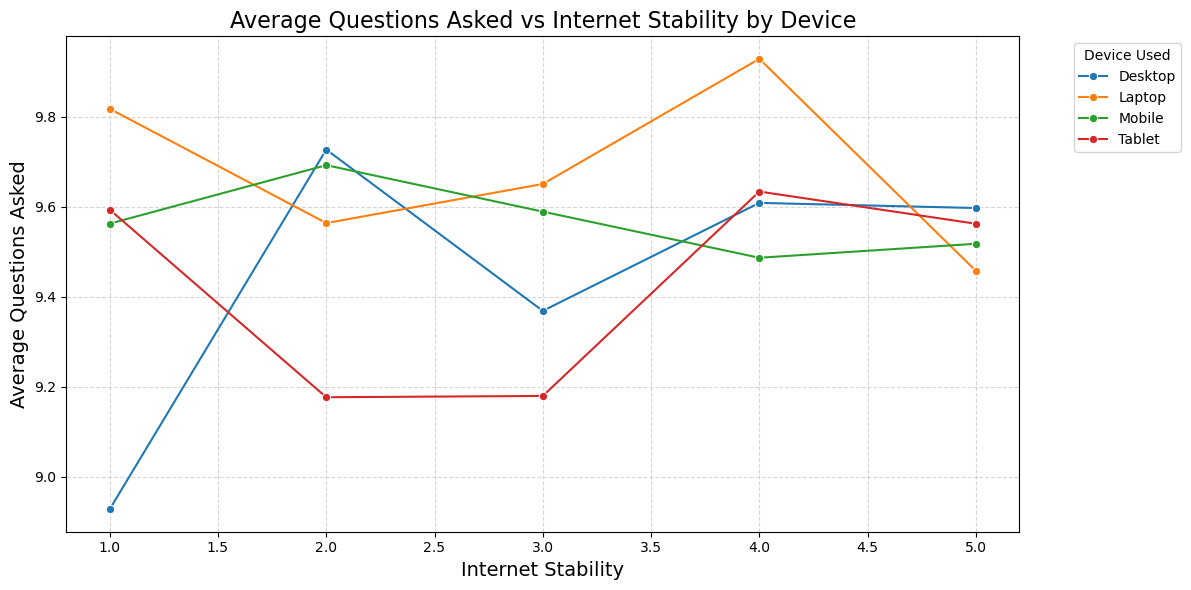

In [60]:
# Group by Internet_Stability and Device_Used
df_grouped = df.groupby(['Internet_Stability', 'Device_Used'], as_index=False)['Questions_Asked'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='Internet_Stability',
    y='Questions_Asked',
    hue='Device_Used',  # Different line for each device
    marker='o')
plt.title('Average Questions Asked vs Internet Stability by Device', fontsize=16)
plt.xlabel('Internet Stability', fontsize=14)
plt.ylabel('Average Questions Asked', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Device Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### final Summary
From this EDA, we conclude that technical factors (internet stability and device used) and behavioral factors (attendance and group activity participation) play a significant role in shaping student engagement in virtual classrooms.Students with stable internet and laptops/desktops engage more actively. Higher attendance leads to better feedback ratings, while group activities also enhance participation. These insights can help educators improve online learning experiences.